# Do your work for this exercise in a jupyter notebook named feature_engineering within the regression-exercises repo. Add, commit, and push your work.

In [1]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

#import libraries
import pandas as pd
import numpy as np

#import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
from pydataset import data

#sklearn imports
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## 1. Load the tips dataset.

In [2]:
#import tips
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
df = df.rename(columns={'size': 'party_size'})

## a. Create a column named price_per_person. This should be the total bill divided by the party size.

In [17]:
df['price_per_person'] = df.total_bill / df['party_size']

In [18]:
df.head()

,total_bill,tip,sex,smoker,day,time,party_size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


## b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

In [19]:
f'total_bill, size'

'total_bill, size'

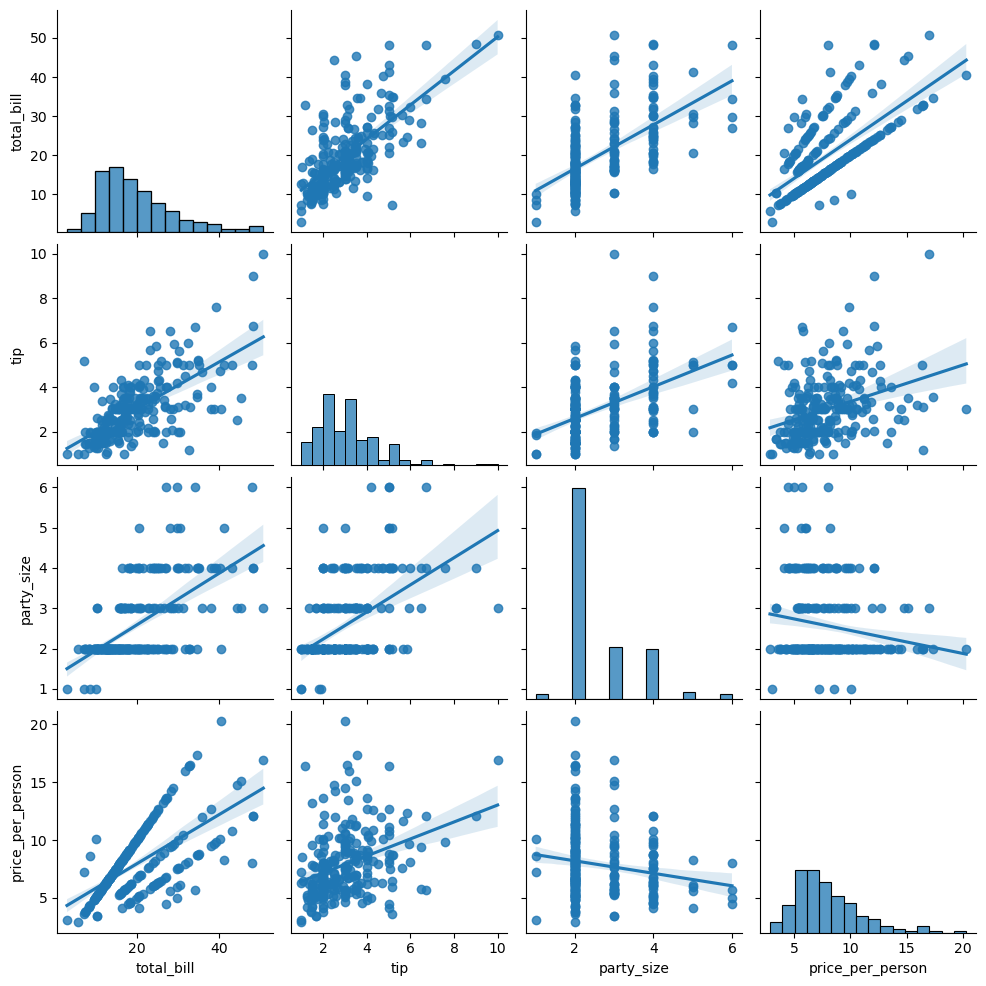

In [20]:
sns.pairplot(df, kind='reg')

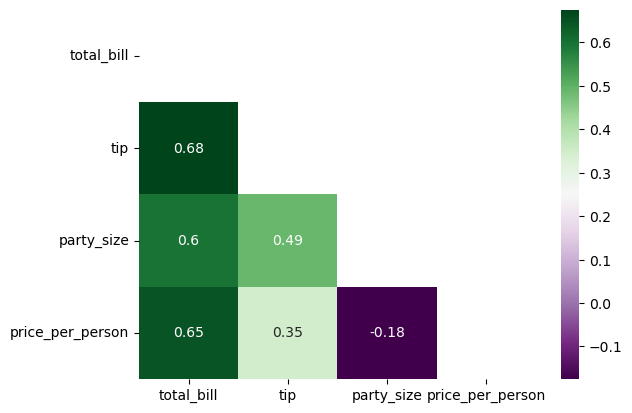

In [21]:
sns.heatmap(df.corr(), cmap='PRGn', annot=True,
           mask=np.triu(df.corr()))
plt.show()

## c. Use select k best to select the top 2 features for predicting tip amount. What are they?

In [22]:
# creating functions to get features under object items and numeric items

def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    object_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return object_cols


def get_numeric_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    num_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    
    return num_cols

In [23]:
obj_cols = get_object_cols(df)

In [24]:
#Create dummy cols for cat feats

df_dummy=pd.get_dummies(columns=obj_cols, data=df)

In [25]:
df_dummy.head()

,total_bill,tip,party_size,price_per_person,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
1,16.99,1.01,2,8.495000,1,0,1,0,0,0,1,0,1,0
2,10.34,1.66,3,3.446667,0,1,1,0,0,0,1,0,1,0
3,21.01,3.50,3,7.003333,0,1,1,0,0,0,1,0,1,0
4,23.68,3.31,2,11.840000,0,1,1,0,0,0,1,0,1,0
5,24.59,3.61,4,6.147500,1,0,1,0,0,0,1,0,1,0


In [26]:
#drop a couple cols that are redundant

df_dummy.drop(columns = ['sex_Female', 'smoker_No', 'time_Dinner', 'day_Thur'], inplace=True)
df_dummy.head()


,total_bill,tip,party_size,price_per_person,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,time_Lunch
1,16.99,1.01,2,8.495000,0,0,0,0,1,0
2,10.34,1.66,3,3.446667,1,0,0,0,1,0
3,21.01,3.50,3,7.003333,1,0,0,0,1,0
4,23.68,3.31,2,11.840000,1,0,0,0,1,0
5,24.59,3.61,4,6.147500,0,0,0,0,1,0


In [29]:
#create a function to split our data
def split_data(df):
    '''
    This function takes in a dataframe and splits the data,
    returning three pandas dataframes, train, test, and validate
    '''
    
    # Create train_validate and test datasets
    train_validate, test = train_test_split(df, test_size=0.2, random_state=123)
    
    # Create train and validate datsets
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=123)

    # Take a look at your split datasets

    print(f"""
    train -> {train.shape}
    validate -> {validate.shape}
    test -> {test.shape}""")
    
    return train, validate, test

In [27]:
#create a function to isolate the target variable
def X_y_split(df, target):
    '''
    This function takes in a dataframe and a target variable
    Then it returns the X_train, y_train, X_validate, y_validate, X_test, y_test
    and a print statement with the shape of the new dataframes
    '''  
    train, validate, test = split_data(df)

    X_train = train.drop(columns= target)
    y_train = train[target]

    X_validate = validate.drop(columns= target)
    y_validate = validate[target]

    X_test = test.drop(columns= target)
    y_test = test[target]
        
    # Have function print datasets shape
    print(f'''
    X_train -> {X_train.shape}
    X_validate -> {X_validate.shape}
    X_test -> {X_test.shape}''') 
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [30]:
# split that data!

train, validate, test = split_data(df_dummy)


    train -> (136, 10)
    validate -> (59, 10)
    test -> (49, 10)


In [31]:
X_train, y_train, X_validate, y_validate, X_test, y_test = X_y_split(df_dummy, 'tip')


    train -> (136, 10)
    validate -> (59, 10)
    test -> (49, 10)

    X_train -> (136, 9)
    X_validate -> (59, 9)
    X_test -> (49, 9)


In [38]:
def scale_data(train, 
               validate, 
               test, 
               to_scale):
    #make copies for scaling
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()

    #scale them!
    #make the thing
    scaler = MinMaxScaler()

    #fit the thing
    scaler.fit(train[to_scale])

    #use the thing
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled

In [39]:
X_train.columns.tolist()

['total_bill',
 'party_size',
 'price_per_person',
 'sex_Male',
 'smoker_Yes',
 'day_Fri',
 'day_Sat',
 'day_Sun',
 'time_Lunch']

In [40]:
to_scale = X_train.columns.tolist()

In [41]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test, to_scale)

In [42]:
X_train_scaled.columns

Index(['total_bill', 'party_size', 'price_per_person', 'sex_Male',
       'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch'],
      dtype='object')

In [36]:
print(f"""
X_train_scaled: {X_train_scaled.shape} 
X_validate_scaled: {X_validate_scaled.shape} 
X_test_scaled: {X_test_scaled.shape}
""")


X_train_scaled: (136, 9) 
X_validate_scaled: (59, 9) 
X_test_scaled: (49, 9)



In [37]:
X_train_scaled.head()

,total_bill,party_size,price_per_person,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,time_Lunch
19,0.307114,0.4,0.150344,0.0,0.0,0.0,0.0,1.0,0.0
173,0.092355,0.2,0.032258,1.0,1.0,0.0,0.0,1.0,0.0
119,0.206805,0.2,0.182796,0.0,0.0,0.0,0.0,0.0,1.0
29,0.411622,0.2,0.452194,1.0,0.0,0.0,1.0,0.0,0.0
238,0.657534,0.2,0.775647,1.0,1.0,0.0,1.0,0.0,0.0


# Select K Best

In [44]:
#MAKE the thing
kbest = SelectKBest(f_regression, k=2)

#FIT the thing
kbest.fit(X_train_scaled, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x131e74b80>)

In [45]:
#Turn the f scores into a df to view

kbest_results = pd.DataFrame(dict(p_value=kbest.pvalues_, f_score=kbest.scores_), 
                index=X_train_scaled.columns)

In [46]:
# sorting values by 'f_force'
kbest_results.sort_values(by=['f_score'], ascending=False)

,p_value,f_score
total_bill,7.186470e-20,115.984909
party_size,1.341642e-12,61.259089
price_per_person,1.310327e-03,10.777792
day_Sun,1.236625e-01,2.400404
time_Lunch,1.821449e-01,1.798647
sex_Male,2.844794e-01,1.154792
day_Fri,4.068238e-01,0.692418
smoker_Yes,5.579978e-01,0.344909
day_Sat,9.550468e-01,0.003190


In [47]:
kbest_results.sort_values(by=['f_score'], ascending=False).head(2)

,p_value,f_score
total_bill,7.186470e-20,115.984909
party_size,1.341642e-12,61.259089


In [48]:
#create the mask
feature_mask = kbest.get_support()

#now we are going to ask for the column names of select k best top 2 features
X_train_scaled.columns[feature_mask]

Index(['total_bill', 'party_size'], dtype='object')

## d . Use recursive feature elimination to select the top 2 features for tip amount. What are they?

In [96]:
# importing the model feature selector, RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

## Creating the Model

In [67]:
lm = LinearRegression()

In [68]:
# MAKE the thing
rfe = RFE(lm, n_features_to_select=2)# the n_features_to_select selcts the number of 
                                        #features to pick in this case top 2

# FIT the thing
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [69]:
rfe_ranking = pd.DataFrame({'rfe_ranking': rfe.ranking_},
                              index=X_train_scaled.columns)

In [71]:
rfe_ranking # the features with ranking 1 are the two selected

,rfe_ranking
total_bill,1
party_size,2
price_per_person,1
sex_Male,3
smoker_Yes,6
day_Fri,4
day_Sat,7
day_Sun,5
time_Lunch,8


In [72]:
#create a variable that takes X_train and turns rfe features into a list
rfe_columns = X_train_scaled.columns[rfe.support_].tolist()

#call the variable
rfe_columns

['total_bill', 'price_per_person']

## e .Why do you think select k best and recursive feature elimination might give different answers for the top features? 
### Does this change as you change the number of features you are selecting?

In [ ]:
f'I think the function weighs features differently'

In [73]:
X_train_scaled.columns[SelectKBest(score_func=f_regression, k=2).fit(X_train_scaled, y_train).get_support()]


Index(['total_bill', 'party_size'], dtype='object')

In [74]:
X_train_scaled.columns[SelectKBest(score_func=f_regression, k=5).fit(X_train_scaled, y_train).get_support()]


Index(['total_bill', 'party_size', 'price_per_person', 'day_Sun',
       'time_Lunch'],
      dtype='object')

In [76]:
X_train_scaled.columns[RFE(LinearRegression(), n_features_to_select=2).fit(X_train_scaled, y_train).get_support()]


Index(['total_bill', 'price_per_person'], dtype='object')

In [75]:
X_train_scaled.columns[RFE(LinearRegression(), n_features_to_select=5).fit(X_train_scaled, y_train).get_support()]


Index(['total_bill', 'party_size', 'price_per_person', 'sex_Male', 'day_Fri'], dtype='object')

## 2. Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [83]:
# creating the function
# X = X_train_scaled, y = y_train, 
# number_of_features = number of features to select as top fatures

def select_kbest(X_scaled, y, number_of_features):
    
    #MAKE the thing
    kbest = SelectKBest(f_regression, k=number_of_features)

    #FIT the thing
    kbest.fit(X_scaled, y)
    
    
    #create the mask
    feature_mask = kbest.get_support()

    #now we are going to ask for the column names of select k best top 2 features
    X_scaled.columns[feature_mask]
    
    return X_scaled.columns[feature_mask]


In [84]:
select_kbest(X_train_scaled, y_train, 2)

Index(['total_bill', 'party_size'], dtype='object')

In [85]:
select_kbest(X_train_scaled, y_train, 5)

Index(['total_bill', 'party_size', 'price_per_person', 'day_Sun',
       'time_Lunch'],
      dtype='object')

## 3. Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [103]:
#creating a funciton to use RFE
def rfe_model(X_scaled, y, number_of_features):
    
    lm = LinearRegression()
    
    # MAKE the thing
    rfe = RFE(lm, n_features_to_select=number_of_features) # the n_features_to_select= needs to have a value equal to
    
    # FIT the thing
    rfe.fit(X_scaled, y)
    
    X_scaled.columns[rfe.support_].tolist()# .support the same as .get_support()
    
    return X_scaled.columns[rfe.support_].tolist()
    

In [104]:
rfe_model(X_train_scaled, y_train, 2)

['total_bill', 'price_per_person']

In [105]:
rfe_model(X_train_scaled, y_train, 5)

['total_bill', 'party_size', 'price_per_person', 'sex_Male', 'day_Fri']

## 4. Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [119]:
df = data('swiss')
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [120]:
obj_cols = get_object_cols(df)

In [121]:
df_dummy=pd.get_dummies(columns=obj_cols, data=df)

In [122]:
train, validate, test = split_data(df)


    train -> (25, 6)
    validate -> (12, 6)
    test -> (10, 6)


In [123]:
X_train, y_train, X_validate, y_validate, X_test, y_test = X_y_split(df, 'Fertility')


    train -> (25, 6)
    validate -> (12, 6)
    test -> (10, 6)

    X_train -> (25, 5)
    X_validate -> (12, 5)
    X_test -> (10, 5)


In [124]:
to_scale = X_train.columns.tolist()

In [126]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test, to_scale)

In [129]:
select_kbest(X_train_scaled, y_train, 3)

Index(['Examination', 'Catholic', 'Infant.Mortality'], dtype='object')

In [130]:
rfe_model(X_train_scaled, y_train, 3)

['Agriculture', 'Examination', 'Infant.Mortality']